In [70]:
what_were_coding = {1: "data (prepare and load)",
2: "build model",
3: "fitting the model to data (training)",
4: "making predictions and evaulating a model (inference)",
5: "saving and loading a model",
6: "putting it all together"
}
what_were_coding

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaulating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [71]:
import torch
import matplotlib.pyplot as plt
from torch import nn # nn contains all of PyTorch's building blocks for neural networks

# Check PyTorch version
torch.__version__

'2.1.0+cu118'

## 1. Data (preparing and loading)

Data can be almost anything...in machine learning

* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [72]:
# Create *known* parameters
weight = 0.7  
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [73]:
len(X), len(y)

(50, 50)

 ### Splitting data into training and test sets (one of the most important concepts in machine learning in general)

 Let's create a training and test set with our data

In [74]:
# Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

In [75]:
def plot_predictions(
        train_data = X_train,
        train_labels= y_train,
        test_data= X_test,
        test_labels= y_test,
        predictions= None        
):
    """
        Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10,7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

    # Plot test data in purple
    plt.scatter(test_data, test_labels, c="m", s=4, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show legend
    plt.legend(prop={"size":14})

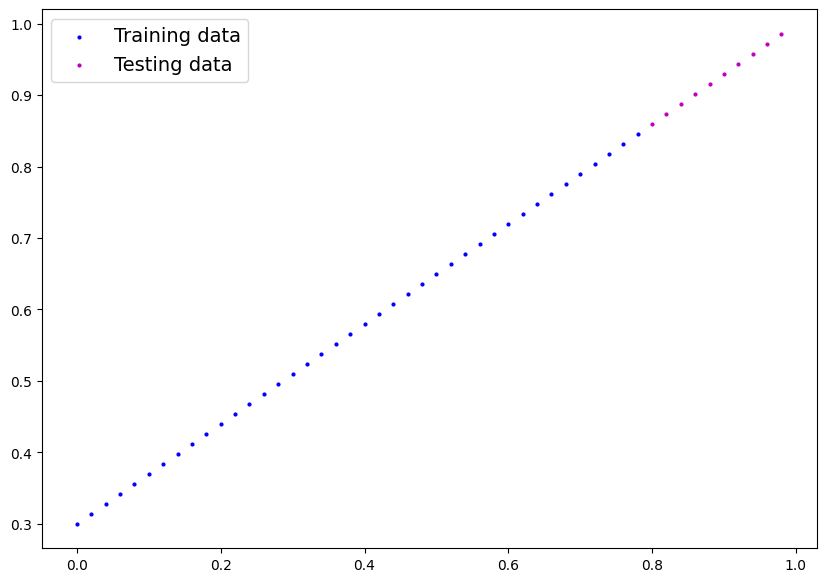

In [76]:
plot_predictions()


## 2. Build model

Our first PyTorch model!

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better
represent (or get closer to) the ideal values (the weight and bias values we used 
to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent - https://www.youtube.com/watch?v=IHZwWFHWa-w
2. Backpropagation - https://www.youtube.com/watch?v=Ilg3gGewQ5U

In [77]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with a random weight and try to adjust it to the ideal weight
                                                requires_grad=True, # <- can this parameter be updated via gradient descent?
                                                dtype=torch.float # <- PyTorch loves the datatype torch.float32
                                                ))
        self.bias = nn.Parameter(torch.randn(1, # <- start with a random bias and try to adjust it to the ideal bias
                                             requires_grad=True, # <- can this parameter be updated via gradient descent?
                                             dtype=torch.float # <- PyTorch loves the datatype torch.float32
                                             ))
        
    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
            return self.weights * x + self.bias # this is the linear regression fromula
        

### PyTorch model building essentials

* torch.nn - contains all of the building for computational graphs (a neural network can be computaional graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - the base class for all neural network models, if you subclass it, you should overwrite forward()
* torch.optim - this is where the optimizers in PyTorch live, this will help with gradient descent
* def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

PyTorch essential cheat sheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created a model, let' see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`

In [78]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [79]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [80]:
weight, bias

(0.7, 0.3)

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` basedon `X_test`

When we pass data through out model, it's going to run it through our forward method

In [81]:
y_pred = model_0(X_test)
y_pred 

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [82]:
# Make predictions with model
with torch.inference_mode(): # Inference mode disables gradient tracking (faster when making predictions)
    y_pred = model_0(X_test)

# You can also do something similar with torch.no_grad(), but inference_mode() is perfered
with torch.no_grad():
    y_pred = model_0(X_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

See more on inference mode here - https://twitter.com/PyTorch/status/1437838231505096708?lang=en

In [83]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

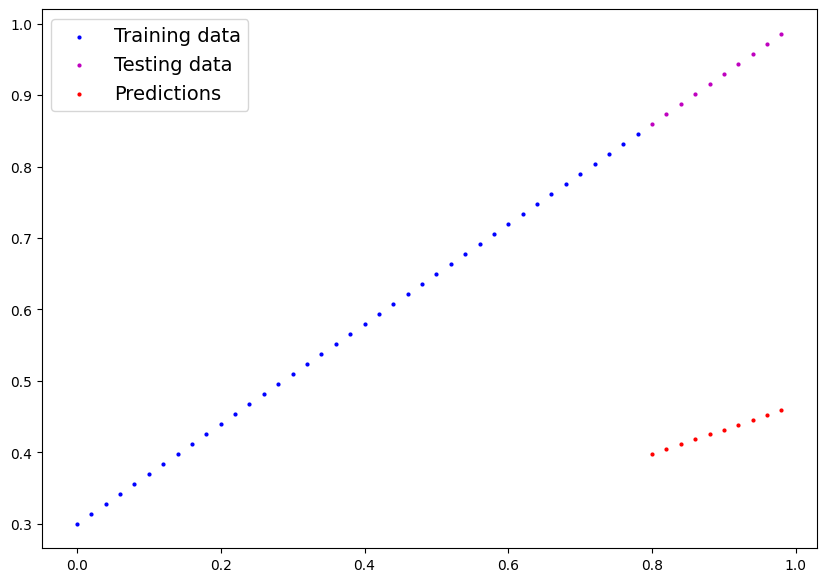

In [84]:
plot_predictions(predictions=y_pred)

### 3. Train model

The whole idea of training is a model to move from some *unknown* parameters (these may be random) to some known parameters

Or in other words from a poor representation of the data to a better representations of the data.

One way to measure how poor or how wrong the model's predictions are is a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function. 

Things we need to train:

* **Loss function:** A function to measure how wrong your model's prediction are to the ideal outputs, lower is better
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to imporve the loss function. -https://pytorch.org/docs/stable/optim.html

And specifically for PyTorch, we need:
* A training loop 
* A testing loop

In [85]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [86]:
# Check out our models parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [87]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01) # lr = learning rate = possibly the most important hyperparameter  (a small lr => small change, a large lr => large change )

### Building a training loop (and a testing loop) in PyTorch

A couple things we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this invovles data moving through our model's `forward()` functions) to make predictions on data - also called foward propgation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation** - https://www.youtube.com/watch?v=tIeHLnjs5U8)
5. Optimizer step - use the optimizer to adjust the model's parameters to try to improve loss (**gradient descent** - https://www.youtube.com/watch?v=IHZwWFHWa-w)

In [88]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter beacuse we've set it ourself)
epochs = 100

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss 
    loss = loss_fn(y_pred, y_train)
    # print(f'Loss: {loss}')

    # 3. Optimizer zero grad
    optimizer.zero_grad() 

    # 4. Perform backpropagation on the loss with respect to the parmeters of the model
    loss.backward()

    # 5.Set up the optimizer (perform gradient descent) 
    optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop
    
    ### Testing
    model_0.eval() # turns off gradient tracking, turns off different settings in model not needed for evaluation/testing
    with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes
    # with torch.no_grad(): # you may also see this in older PyTorch code
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    # Print out what's happenin'
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        # Print out model state_dict()
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [89]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)

In [90]:
weight, bias

(0.7, 0.3)

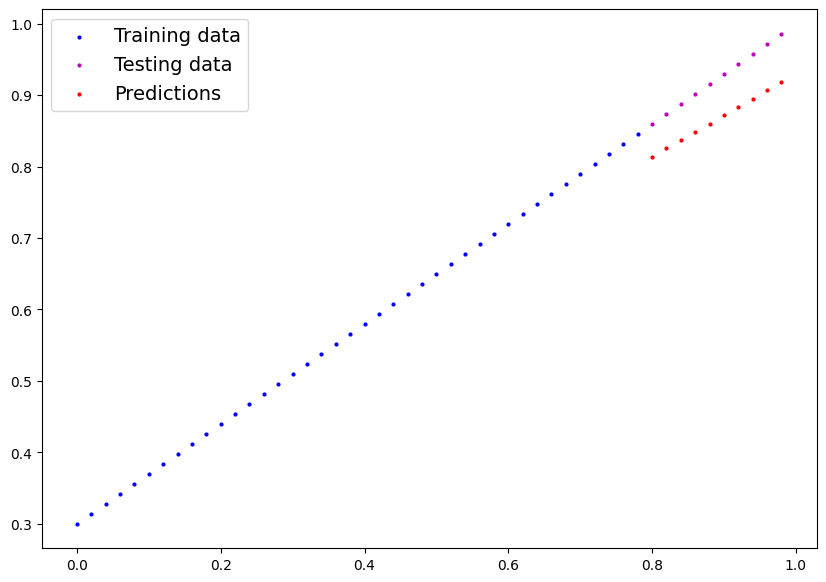

In [91]:
plot_predictions(predictions=y_preds_new)